Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import plotly.express as px

In [2]:
appearances_df = pd.read_csv('appearances.csv')
clubs_df = pd.read_csv("clubs.csv")
club_games_df = pd.read_csv("club_games.csv")
competitions_df = pd.read_csv("competitions.csv")
game_events_df = pd.read_csv("game_events.csv")
games_df = pd.read_csv("games.csv")
player_valuations_df = pd.read_csv("player_valuations.csv")
players_df = pd.read_csv("players.csv")

Turkish Süper Lig Clubs

In [8]:
turkish_league_teams = clubs_df[(clubs_df['domestic_competition_id'] == 'TR1') & (clubs_df['last_season'] == 2023)]
turkish_league_teams

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
27,868,mke-ankaragucu,Makina ve Kimya Endüstrisi Ankaragücü Spor Kulübü,TR1,NaN,28,27.3,17,60.7,6,Eryaman Stadyumu,20560,€-3.35m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/mke-ankaragucu...
50,449,trabzonspor,Trabzonspor Kulübü,TR1,NaN,32,25.8,16,50.0,15,Papara Park,40782,€-13.11m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/trabzonspor/st...
55,6890,istanbul-basaksehir-fk,İstanbul Başakşehir Futbol Kulübü,TR1,NaN,34,26.1,16,47.1,6,Başakşehir Fatih Terim,17156,+-0,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/istanbul-basak...
67,141,galatasaray-istanbul,Galatasaray Spor Kulübü,TR1,NaN,30,25.9,16,53.3,11,Ali Sami Yen Spor Kompleksi RAMS Park,52223,€-11.79m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/galatasaray-is...
109,589,antalyaspor,Antalyaspor,TR1,NaN,34,26.5,15,44.1,5,Corendon Airlines Park Antalya Stadı,32537,+€9.43m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/antalyaspor/st...
182,2381,sivasspor,Sivasspor Kulübü,TR1,NaN,28,29.1,13,46.4,4,Yeni 4 Eylül Stadı,27532,+€400k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sivasspor/star...
187,2832,gaziantep-fk,Gaziantep Futbol Kulübü A.Ş.,TR1,NaN,31,27.1,15,48.4,5,Kalyon Stadyumu,33502,€-585k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/gaziantep-fk/s...
224,2293,konyaspor,Konyaspor,TR1,NaN,29,27.2,12,41.4,4,Medaş Konya Büyükşehir Stadyumu,42000,+€1.80m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/konyaspor/star...
230,36,fenerbahce-istanbul,Fenerbahçe Spor Kulübü,TR1,NaN,29,27.8,16,55.2,16,Ülker Stadyumu FB Şükrü Saraçoğlu Spor Kompleksi,47834,€-1.36m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fenerbahce-ist...


Turkish Süper Lig Players

In [9]:
selected_clubs = ["Besiktas JK", "MKE Ankaragücü", "Trabzonspor", "Basaksehir FK", "Galatasaray",
                  "Antalyaspor", "Sivasspor", "Gaziantep FK" ,"Konyaspor", "Fenerbahce", "Fatih Karagümrük", "Istanbulspor",
                  "Alanyaspor", "Samsunspor", "Pendikspor", "Adana Demirspor", "Hatayspor", "Caykur Rizespor", "Kayserispor", "Kasimpasa"]

turkish_league_players = players_df[(players_df['current_club_name'].isin(selected_clubs)) & (players_df['last_season'] == 2023)]
turkish_league_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
471,131951,Kevin,Lasagna,Kevin Lasagna,2023,6646,kevin-lasagna,Italy,Suzzara,Italy,...,left,181.0,1600000.0,8000000.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kevin-lasagna/...,TR1,Fatih Karagümrük
513,157543,Dimitrios,Kourbelis,Dimitrios Kourbelis,2023,449,dimitrios-kourbelis,Greece,Tripoli,Greece,...,right,181.0,1500000.0,2000000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitrios-kour...,TR1,Trabzonspor
549,170895,Garry,Rodrigues,Garry Rodrigues,2023,868,garry-rodrigues,Netherlands,Rotterdam,Cape Verde,...,right,173.0,1800000.0,9000000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/garry-rodrigue...,TR1,MKE Ankaragücü
554,172163,Uğur,Çiftçi,Uğur Çiftçi,2023,2381,uğur-ciftci,Turkey,Sivas,Turkey,...,left,179.0,1900000.0,2750000.0,2027-06-30 00:00:00,GPA Turkey,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/uğur-ciftci/pr...,TR1,Sivasspor
584,189070,Modou,Barrow,Modou Barrow,2023,2381,modou-barrow,The Gambia,Banjul,The Gambia,...,left,176.0,1000000.0,3000000.0,2024-06-30 00:00:00,VMC Group AB,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/modou-barrow/p...,TR1,Sivasspor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30250,217863,NaN,Guilherme,Guilherme,2023,2293,guilherme,Brazil,Porto Alegre,Brazil,...,left,180.0,1100000.0,2200000.0,2024-06-30 00:00:00,Jose Renato Martinez,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/guilherme/prof...,TR1,Konyaspor
30252,230746,Erdal,Rakip,Erdal Rakip,2023,589,erdal-rakip,Sweden,Malmö,North Macedonia,...,right,179.0,1000000.0,1500000.0,2025-06-30 00:00:00,FPA,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdal-rakip/pr...,TR1,Antalyaspor
30278,580276,Emrehan,Gedikli,Emrehan Gedikli,2023,2293,emrehan-gedikli,Germany,Oberhausen,Turkey,...,right,187.0,350000.0,1200000.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/emrehan-gedikl...,TR1,Konyaspor
30285,882568,Deniz,Ertaş,Deniz Ertaş,2023,2293,deniz-ertaş,Turkey,Izmir,Turkey,...,NaN,NaN,75000.0,75000.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/deniz-ertaş/pr...,TR1,Konyaspor


Club Market Values

Squad Size

In [10]:
squad_size = turkish_league_players.groupby('current_club_name').size().reset_index(name='squad_size')
squad_size = squad_size.sort_values(by='squad_size', ascending=False)
squad_size.head()

,current_club_name,squad_size
5,Caykur Rizespor,36
2,Antalyaspor,34
3,Basaksehir FK,34
0,Adana Demirspor,32
19,Trabzonspor,32


In [11]:
club_total_value = turkish_league_players.groupby('current_club_name')['market_value_in_eur'].sum().reset_index()
club_total_value.columns = ['Club', 'Total Market Value (EUR)'] # Renaming the columns for clarity
club_total_value = club_total_value.sort_values(by='Total Market Value (EUR)', ascending=False)
club_total_value['Market Value'] = club_total_value['Total Market Value (EUR)'].apply(lambda x: '{:,.2f} EUR'.format(x))

# Merge "club_total_value" and "squad_size"
club_total_value_merged = club_total_value.merge(squad_size[['current_club_name', 'squad_size']], left_on='Club', right_on='current_club_name', how='left')

club_total_value_merged = club_total_value_merged.drop(columns='current_club_name')
club_total_value_merged[["Club", "Market Value", "squad_size"]]

,Club,Market Value,squad_size
0,Galatasaray,"236,575,000.00 EUR",30
1,Fenerbahce,"200,550,000.00 EUR",29
2,Besiktas JK,"129,775,000.00 EUR",32
3,Trabzonspor,"125,350,000.00 EUR",32
4,Basaksehir FK,"60,200,000.00 EUR",34
5,Adana Demirspor,"45,900,000.00 EUR",32
6,Samsunspor,"34,500,000.00 EUR",31
7,Antalyaspor,"31,425,000.00 EUR",34
8,MKE Ankaragücü,"30,450,000.00 EUR",28
9,Konyaspor,"29,925,000.00 EUR",29


Total Market Value of Turkish Clubs

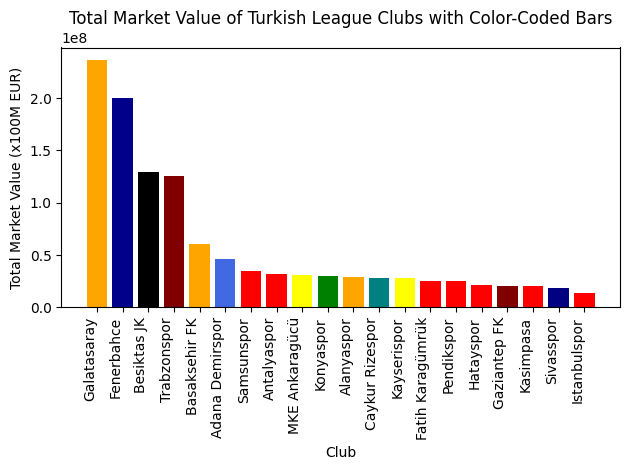

In [32]:
clubs = club_total_value_merged["Club"]
market_values = club_total_value_merged["Total Market Value (EUR)"] # Access numerical values


colors = ["orange", "darkblue", "black", "maroon", "orange", "royalblue", "red", "red", "yellow", "green", "orange", "teal", "yellow", "red", "red", "red", "#800000", "red", "navy", "red", "yellow"]
plt.bar(clubs, market_values, color=colors)

plt.xlabel("Club")
plt.ylabel("Total Market Value (x100M EUR)")
plt.title("Total Market Value of Turkish League Clubs with Color-Coded Bars")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

Turkish League Squad Sizes

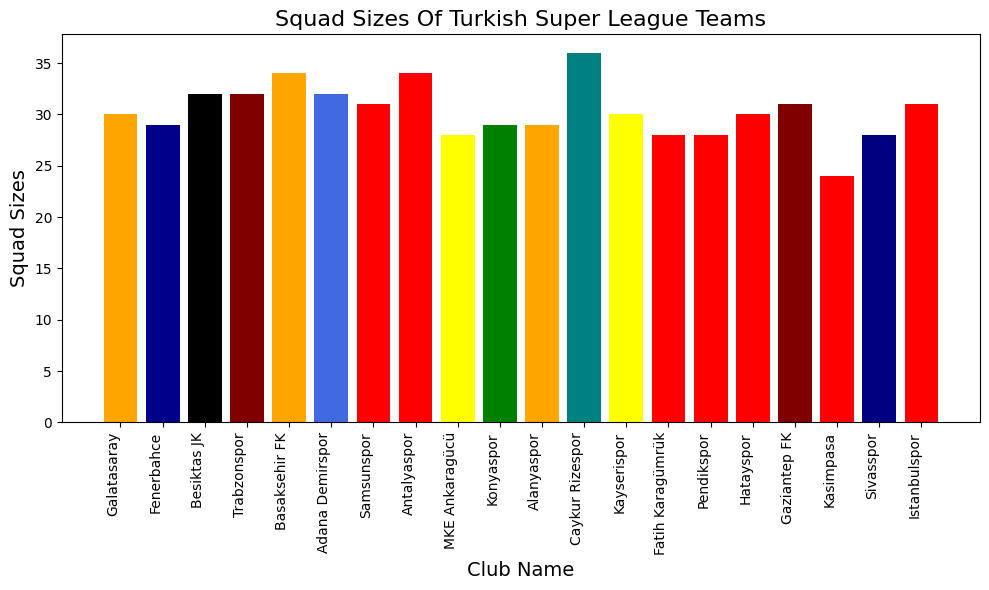

In [33]:
df = club_total_value_merged[["Club", "squad_size"]]

clubs = df["Club"].to_list()
squad_sizes = df["squad_size"].to_list()

plt.figure(figsize=(10, 6))
plt.bar(clubs, squad_sizes, color=colors)

plt.title("Squad Sizes Of Turkish Super League Teams", fontsize=16)
plt.xlabel("Club Name", fontsize=14)
plt.ylabel("Squad Sizes", fontsize=14)
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

Net Transfer Records - Turkish League

In [34]:
# net_transfer_record stores values with symbols like '+-'i, 'm', and '€'. First, I clean the data.

# Conversion function:
def convert_to_int(value):
    if '+-' in value:
        return 0
    if 'm' in value:
        return int(float(value.replace('€', '').replace('m', '')) * 1_000_000)
    elif 'k' in value:
        return int(float(value.replace('€', '').replace('k', '')) * 1_000)
    else:
        return int(value.replace('€', ''))

# Applying the conversion function to the column.
turkish_league_teams['net_transfer_record'] = turkish_league_teams['net_transfer_record'].apply(convert_to_int)

# Now, turkish_league_teams['net_transfer_record'] contains the net transfer records as integers.

C:\Users\Ali Riza Ercan\AppData\Local\Temp\ipykernel_20064\1865054876.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The average net transfer record is: €-1,679,250.00


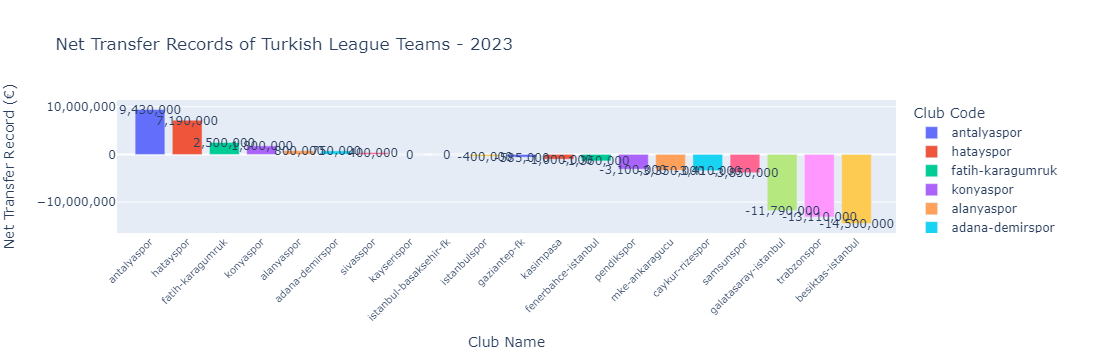

In [35]:
average_net_transfer = turkish_league_teams['net_transfer_record'].mean()

print(f"The average net transfer record is: €{average_net_transfer:,.2f}")

# Now, turkish_league_teams['net_transfer_record'] contains the net transfer records as integers.
fig = px.bar(turkish_league_teams.sort_values(by='net_transfer_record', ascending=False),
             x='club_code', y='net_transfer_record',
             title='Net Transfer Records of Turkish League Teams - 2023',
             labels={'club_code': 'Club Code', 'net_transfer_record': 'Net Transfer Record'},
             color='club_code',
             hover_data=['average_age', 'squad_size'])

# Format the axis labels and values
fig.update_layout(xaxis_title='Club Name', yaxis_title='Net Transfer Record (€)',
                  yaxis_tickformat=',',
                  xaxis=dict(tickvals=turkish_league_teams['club_code'], ticktext=turkish_league_teams['club_code']))  # Set tick values and labels
                  
# Showing values above the columns:
for data in fig.data:
    for i, value in enumerate(data.y):
        if value:
            fig.add_annotation(text=f"{value:,}", x=data.x[i], y=value, showarrow=False)
        else:
            fig.add_annotation(text=f"{value:,}", x=data.x[i], y=value, showarrow=False)
            
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.update_layout(xaxis_tickangle=-45)  # Doğru yöntemle x ekseni etiketlerini döndürün
fig.update_layout(xaxis_tickfont_size=10)  # Etiketlerin okunabilirliğini sağlayın

fig.show()

How is it in Other Leagues? 

In [36]:
clubs_df.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


Average Net Transfer Record in Other Leagues

In [37]:
clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].apply(convert_to_int)

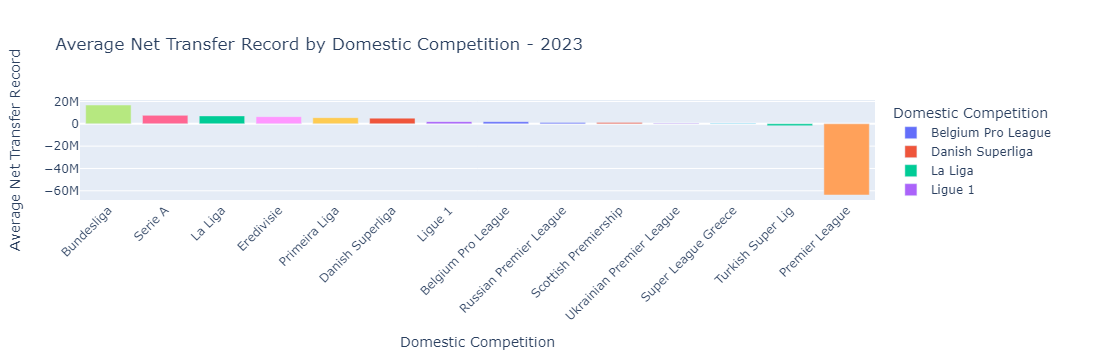

In [38]:
league_mapping = {
    'BE1': 'Belgium Pro League',
    'DK1': 'Danish Superliga',
    'ES1': 'La Liga',
    'FR1': 'Ligue 1',
    'GB1': 'Premier League',
    'GR1': 'Super League Greece',
    'IT1': 'Serie A',
    'L1': 'Bundesliga',
    'NL1': 'Eredivisie',
    'PO1': 'Primeira Liga',
    'RU1': 'Russian Premier League',
    'SC1': 'Scottish Premiership',
    'TR1': 'Turkish Super Lig',
    'UKR1': 'Ukrainian Premier League'
}

condition = clubs_df['last_season'] == 2023
average_net_transfer_by_competition = clubs_df[condition].groupby('domestic_competition_id')['net_transfer_record'].mean().reset_index()

# Replacing numeric IDs with league names using the mapping dictionary.
average_net_transfer_by_competition['domestic_competition_id'] = average_net_transfer_by_competition['domestic_competition_id'].map(league_mapping)

fig = px.bar(average_net_transfer_by_competition, 
             x='domestic_competition_id', 
             y='net_transfer_record',
             title='Average Net Transfer Record by Domestic Competition - 2023',
             labels={'domestic_competition_id': 'Domestic Competition', 'net_transfer_record': 'Average Net Transfer Record'},
             color='domestic_competition_id')
            
fig.update_layout(xaxis_title='Domestic Competition', yaxis_title='Average Net Transfer Record')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.show()

Net Transfer Records - Premier League

In [39]:
premier_league_teams = clubs_df[(clubs_df['domestic_competition_id'] == 'GB1') & (clubs_df['last_season'] == 2023)]
premier_league_teams = premier_league_teams.sort_values(by='net_transfer_record', ascending=True)
premier_league_teams['net_transfer_record'] = premier_league_teams['net_transfer_record'].apply(lambda x: '{:,.2f} EUR'.format(x))
premier_league_teams[['name', 'net_transfer_record']]

,name,net_transfer_record
392,Chelsea Football Club,"-192,700,000.00 EUR"
321,Arsenal Football Club,"-167,040,000.00 EUR"
242,Manchester United Football Club,"-148,060,000.00 EUR"
4,Tottenham Hotspur Football Club,"-130,400,000.00 EUR"
329,Manchester City Football Club,"-126,600,000.00 EUR"
30,Association Football Club Bournemouth,"-126,190,000.00 EUR"
43,Liverpool Football Club,"-111,300,000.00 EUR"
166,Newcastle United Football Club,"-108,600,000.00 EUR"
244,Burnley Football Club,"-107,250,000.00 EUR"
333,Aston Villa Football Club,"-60,450,000.00 EUR"


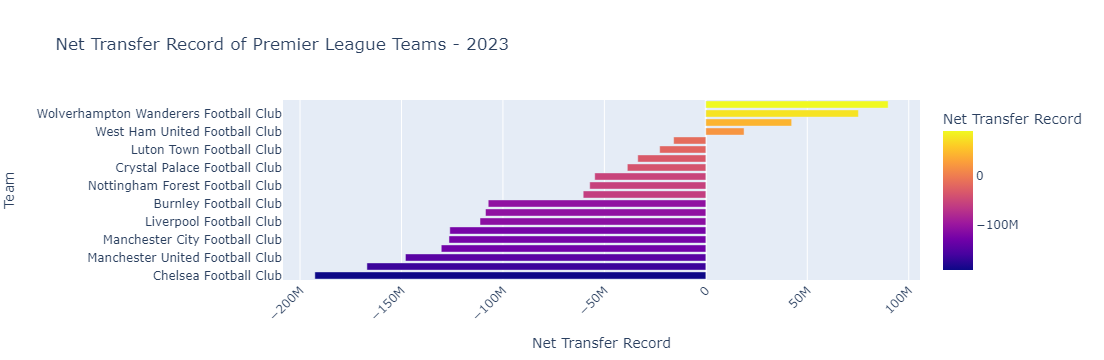

In [40]:
premier_league_teams = clubs_df[(clubs_df['domestic_competition_id'] == 'GB1') & (clubs_df['last_season'] == 2023)]
premier_league_teams = premier_league_teams.sort_values(by='net_transfer_record', ascending=True)

# Create an interactive bar chart
fig = px.bar(premier_league_teams, 
             x='net_transfer_record', 
             y='name',
             title='Net Transfer Record of Premier League Teams - 2023',
             labels={'net_transfer_record': 'Net Transfer Record', 'name': 'Team'},
             color='net_transfer_record',
             hover_data=['net_transfer_record'])
fig.update_layout(xaxis_title='Net Transfer Record', yaxis_title='Team')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.show()

National Team Players of Süper Lig Teams

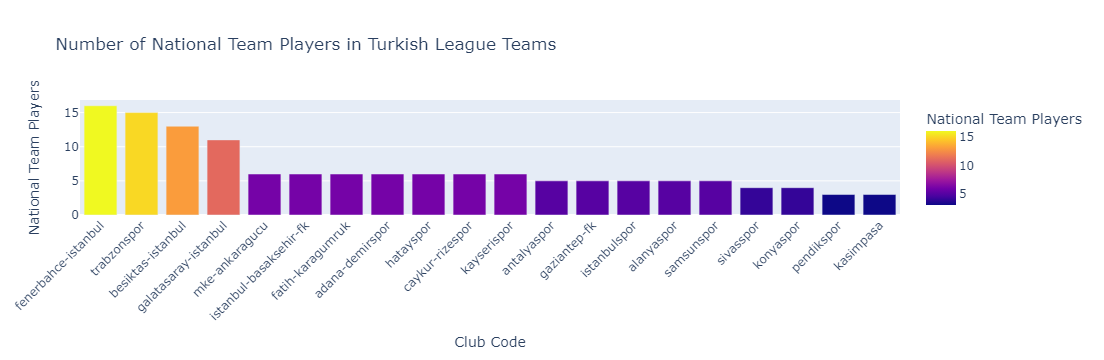

In [41]:
fig = px.bar(turkish_league_teams, 
             x='club_code', 
             y='national_team_players',
             title='Number of National Team Players in Turkish League Teams',
             labels={'club_code': 'Club Code', 'national_team_players': 'National Team Players'},
             color='national_team_players',
             hover_data=['national_team_players'])
fig.update_layout(xaxis_title='Club Code', yaxis_title='National Team Players')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.show()

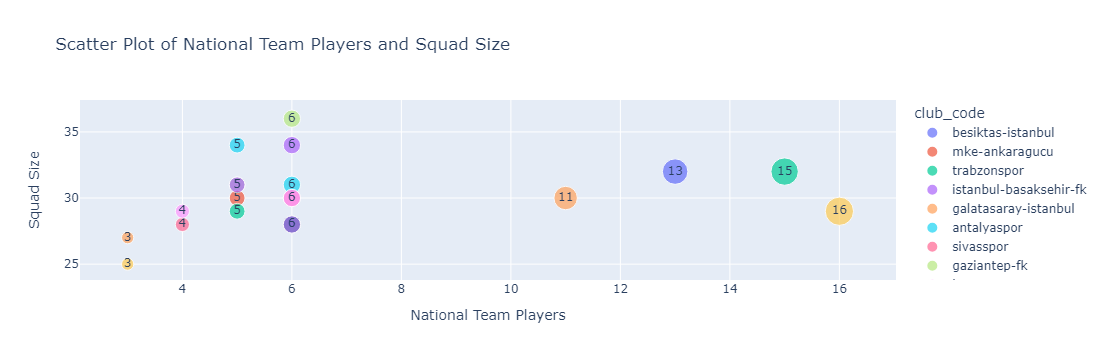

In [42]:
fig = px.scatter(turkish_league_teams, 
                 x='national_team_players', 
                 y='squad_size',
                 title='Scatter Plot of National Team Players and Squad Size',
                 labels={'national_team_players': 'National Team Players', 'squad_size': 'Squad Size'},
                 color='club_code',
                 size='national_team_players',
                 text='national_team_players',
                 hover_data=['name', 'average_age'])
fig.update_layout(xaxis_title='National Team Players', yaxis_title='Squad Size')
fig.show()

Average Age of Süper Lig Teams

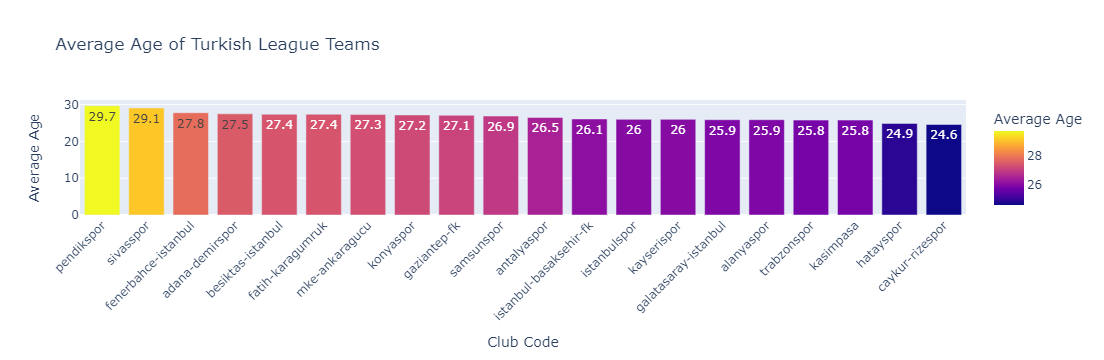

In [43]:
fig = px.bar(turkish_league_teams, x='club_code', y='average_age',
             title='Average Age of Turkish League Teams',
             labels={'club_code': 'Club Code', 'average_age': 'Average Age'},
            color='average_age',
             text='average_age')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.show()

Percentage of Foreign Players of Super Lig Teams

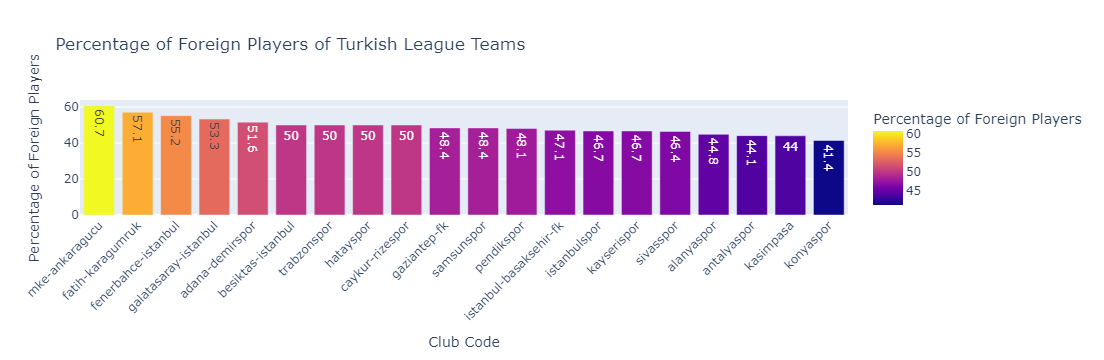

In [44]:
fig = px.bar(turkish_league_teams, x='club_code', y='foreigners_percentage',
             title='Percentage of Foreign Players of Turkish League Teams',
             labels={'club_code': 'Club Code', 'foreigners_percentage': 'Percentage of Foreign Players'},
            color='foreigners_percentage',
             text='foreigners_percentage')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.show()

National vs Foreigner: Fight!

In [45]:
turkish_league_teams.loc[:, 'local_players'] = turkish_league_teams['squad_size'] - turkish_league_teams['foreigners_number']
total_foreigners = turkish_league_teams['foreigners_number'].sum()
total_local_players = turkish_league_teams['local_players'].sum()
total_players = turkish_league_teams['squad_size'].sum()

print(f'Total Players: {total_players}')
print(f'Total Foreigners: {total_foreigners}')
print(f'Total National Players: {total_local_players}')

Total Players: 604
Total Foreigners: 297
Total National Players: 307


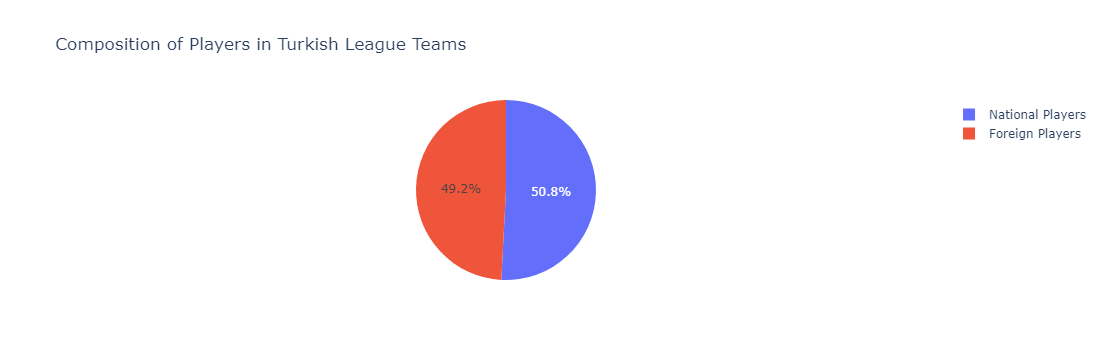

In [46]:
fig = px.pie(names=['National Players', 'Foreign Players'], values=[total_local_players, total_players - total_local_players],
             title='Composition of Players in Turkish League Teams',
             labels={'value': 'Number of Players'},
             )

fig.show()

Where They Come From?

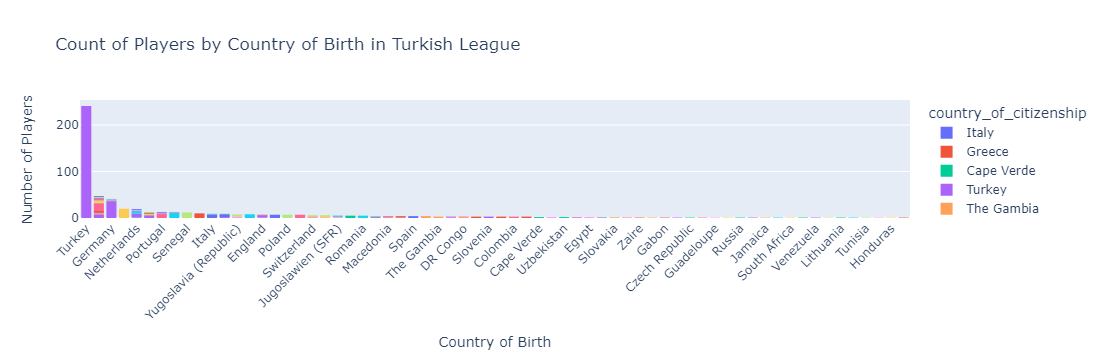

In [47]:
fig = px.histogram(turkish_league_players, x='country_of_birth',
                   title='Count of Players by Country of Birth in Turkish League',
                   labels={'country_of_birth': 'Country of Birth', 'count': 'Number of Players'},
                   category_orders={'country_of_birth': turkish_league_players['country_of_birth'].value_counts().index},
                  color="country_of_citizenship")

fig.update_layout(xaxis_title='Country of Birth', yaxis_title='Number of Players')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.show()

Most Valuable Players

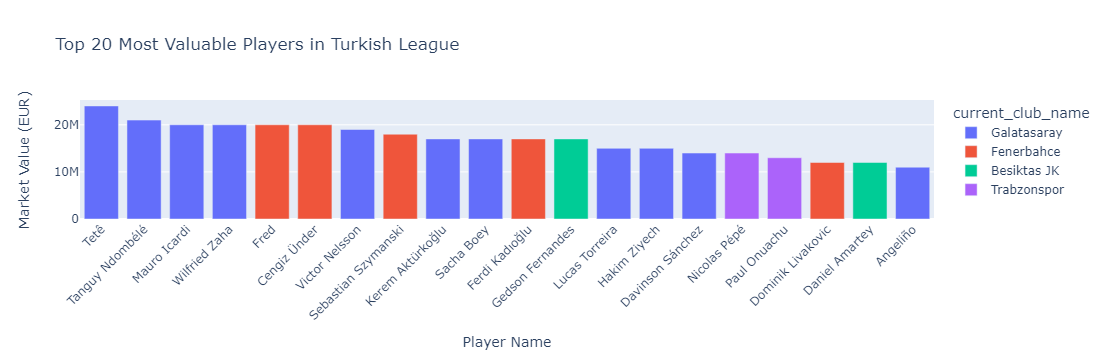

In [48]:
top_20_players = turkish_league_players.nlargest(20, 'market_value_in_eur')

fig = px.bar(top_20_players, x='name', y='market_value_in_eur',
             title='Top 20 Most Valuable Players in Turkish League',
             labels={'name': 'Player Name', 'market_value_in_eur': 'Market Value (EUR)'},
             color='current_club_name',
             hover_data={'market_value_in_eur': ':,.2f', 'position': True})

fig.update_layout(xaxis_title='Player Name', yaxis_title='Market Value (EUR)')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)

fig.show()

"Used to be"

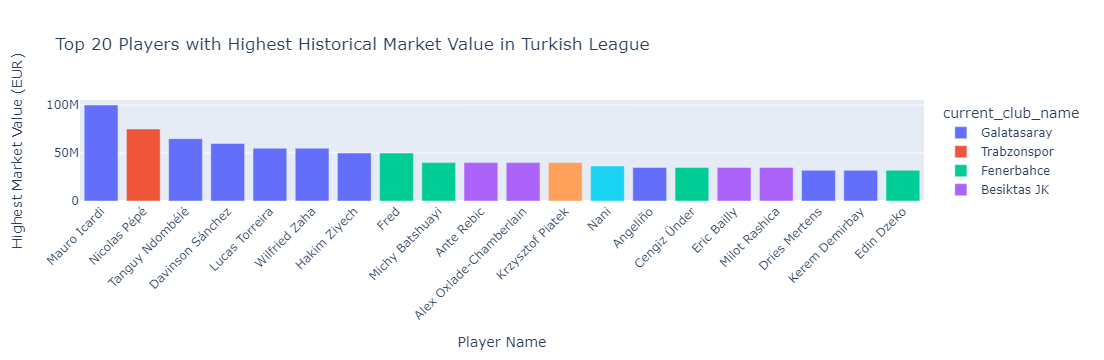

In [19]:
top_20_players = turkish_league_players.nlargest(20, 'highest_market_value_in_eur')

fig = px.bar(top_20_players, x='name', y='highest_market_value_in_eur',
             title='Top 20 Players with Highest Historical Market Value in Turkish League',
             labels={'name': 'Player Name', 'highest_market_value_in_eur': 'Highest Market Value (EUR)'},
             color='current_club_name',
             hover_data={'highest_market_value_in_eur': ':,.2f', 'position': True})

fig.update_layout(xaxis_title='Player Name', yaxis_title='Highest Market Value (EUR)')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)

fig.show()

Youngest Players

C:\Users\Ali Riza Ercan\AppData\Local\Temp\ipykernel_20064\2664239328.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



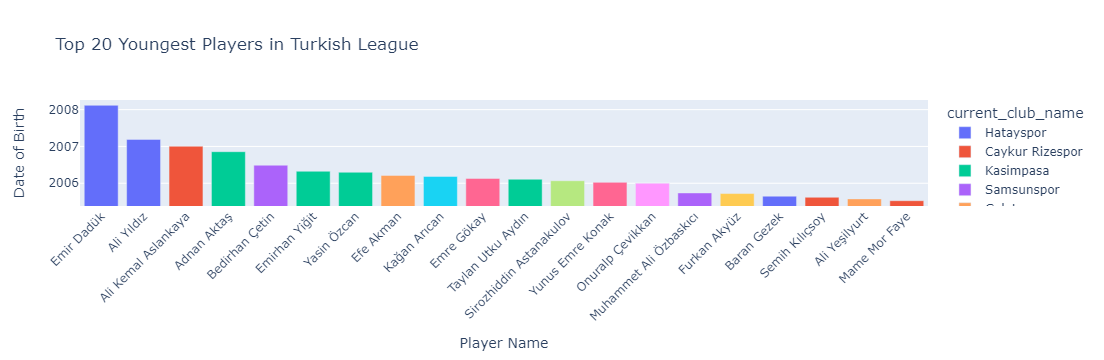

In [49]:
turkish_league_players['date_of_birth'] = pd.to_datetime(turkish_league_players['date_of_birth'])

youngest_players = turkish_league_players.nlargest(20, 'date_of_birth')

fig = px.bar(youngest_players, x='name', y='date_of_birth',
             title='Top 20 Youngest Players in Turkish League',
             labels={'name': 'Player Name', 'date_of_birth': 'Date of Birth'},
             color='current_club_name',
             hover_data=['position', 'market_value_in_eur']
            )

fig.update_layout(xaxis_title='Player Name', yaxis_title='Date of Birth')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)

fig.show()

Oldest Players

C:\Users\Ali Riza Ercan\AppData\Local\Temp\ipykernel_20064\1463150488.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



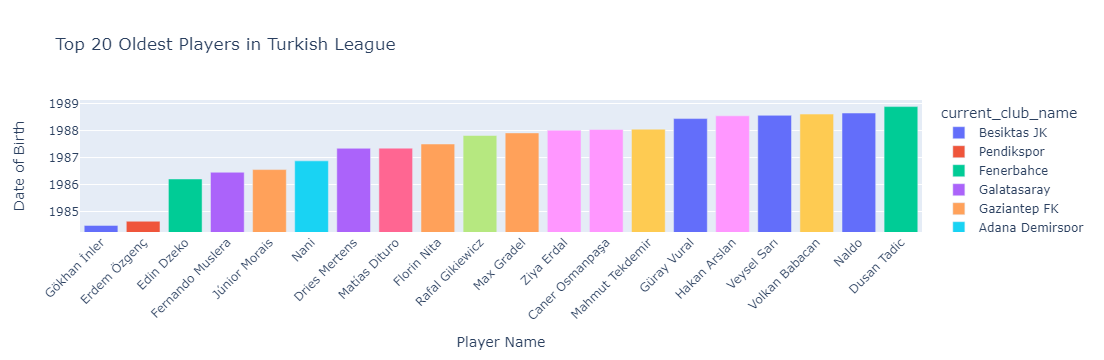

In [50]:
turkish_league_players['date_of_birth'] = pd.to_datetime(turkish_league_players['date_of_birth'])
oldest_players = turkish_league_players.nsmallest(20, 'date_of_birth')
fig = px.bar(oldest_players, x='name', y='date_of_birth',
             title='Top 20 Oldest Players in Turkish League',
             labels={'name': 'Player Name', 'date_of_birth': 'Date of Birth'},
             color='current_club_name',
             hover_data=['position', 'market_value_in_eur']
            )
fig.update_layout(xaxis_title='Player Name', yaxis_title='Date of Birth')
fig.update_xaxes(categoryorder='total ascending', tickangle=-45)
fig.show()

Right footed, left footed?

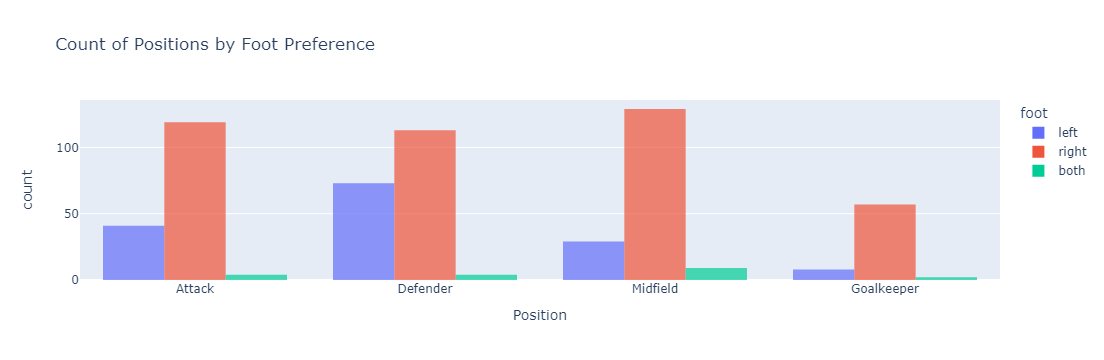

In [51]:
fig = px.histogram(turkish_league_players, x='position', color='foot', barmode='group',
                   title='Count of Positions by Foot Preference',
                   labels={'position': 'Position'}, opacity=0.7)
fig.show()

Height Distibution

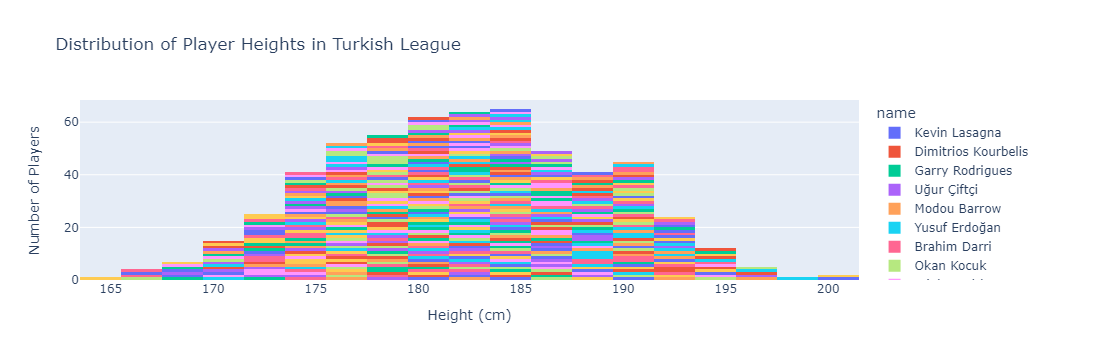

In [23]:
fig = px.histogram(turkish_league_players, x='height_in_cm', nbins=20,
                   title='Distribution of Player Heights in Turkish League',
                   labels={'height_in_cm': 'Height (cm)', 'count': 'Number of Players'}, color="name")

fig.update_layout(xaxis_title='Height (cm)', yaxis_title='Number of Players')

fig.show()

Konyaspor

In [24]:
konyaspor = players_df[(players_df['current_club_name'] == 'Konyaspor') & (players_df['last_season'] == 2023)]
konyaspor.sort_values(by="market_value_in_eur")

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
29763,874764,Mehmet,Erdoğan,Mehmet Erdoğan,2023,2293,mehmet-erdoğan,NaN,NaN,Turkey,...,right,193.0,50000.0,50000.0,2024-06-30 00:00:00,Yasin Çıplak,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mehmet-erdoğan...,TR1,Konyaspor
19932,952174,Ata Berk,Karababa,Ata Berk Karababa,2023,2293,ata-berk-karababa,Turkey,Aydin,Turkey,...,left,NaN,50000.0,50000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ata-berk-karab...,TR1,Konyaspor
30285,882568,Deniz,Ertaş,Deniz Ertaş,2023,2293,deniz-ertaş,Turkey,Izmir,Turkey,...,NaN,NaN,75000.0,75000.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/deniz-ertaş/pr...,TR1,Konyaspor
29957,375719,Yasir,Subaşı,Yasir Subaşı,2023,2293,yasir-subaşı,Turkey,Sakarya,Turkey,...,left,180.0,100000.0,600000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yasir-subaşı/p...,TR1,Konyaspor
19947,82130,Gökhan,Töre,Gökhan Töre,2023,2293,gokhan-tore,Germany,Köln,Turkey,...,left,176.0,150000.0,15000000.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/gokhan-tore/pr...,TR1,Konyaspor
26011,403834,Kahraman,Demirtaş,Kahraman Demirtaş,2023,2293,kahraman-demirtaş,Turkey,Mardin,Turkey,...,left,184.0,175000.0,500000.0,2024-06-30 00:00:00,Ethos Group B.V.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kahraman-demir...,TR1,Konyaspor
28013,85352,Yunus,Mallı,Yunus Mallı,2023,2293,yunus-mallı,Germany,Kassel,Turkey,...,right,179.0,225000.0,13000000.0,2024-06-30 00:00:00,Ilhan Malli,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yunus-mallı/pr...,TR1,Konyaspor
26025,860721,Mehmet Ali,Büyüksayar,Mehmet Ali Büyüksayar,2023,2293,mehmet-ali-buyuksayar,Turkey,Konya,Turkey,...,right,166.0,275000.0,325000.0,2026-06-30 00:00:00,F-F SPORT,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mehmet-ali-buy...,TR1,Konyaspor
30077,260330,Cebrail,Karayel,Cebrail Karayel,2023,2293,cebrail-karayel,Turkey,Corum,Turkey,...,right,176.0,300000.0,1000000.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/cebrail-karaye...,TR1,Konyaspor
26016,633442,Metehan,Mert,Metehan Mert,2023,2293,metehan-mert,Turkey,Ankara,Turkey,...,right,NaN,325000.0,500000.0,2026-06-30 00:00:00,MEK Football,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/metehan-mert/p...,TR1,Konyaspor


Where They Come From? - Konyaspor

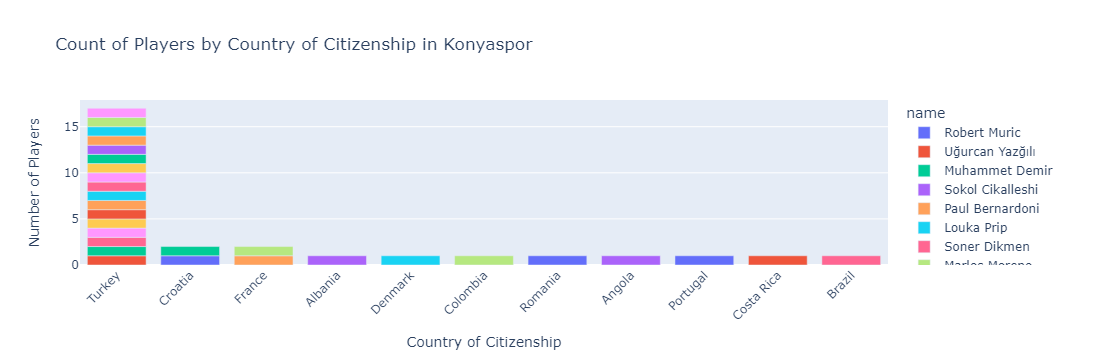

In [25]:
fig = px.bar(konyaspor, x='country_of_citizenship',
                   title='Count of Players by Country of Citizenship in Konyaspor',
                   labels={'country_of_citizenship': 'Country of Citizenship', 'count': 'Number of Players'},
                   category_orders={'country_of_citizenship': turkish_league_players['country_of_citizenship'].value_counts().index},
                   color="name")
                   

fig.update_layout(xaxis_title='Country of Citizenship', yaxis_title='Number of Players')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)
fig.show()

Most Valuable Players - Konyaspor

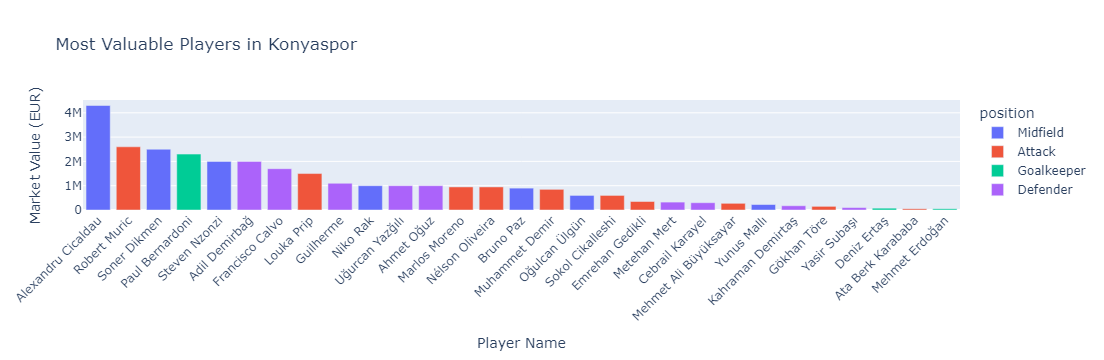

In [26]:
top_players_konyaspor = konyaspor.nlargest(30, 'market_value_in_eur')

fig = px.bar(top_players_konyaspor, x='name', y='market_value_in_eur',
             title='Most Valuable Players in Konyaspor',
             labels={'name': 'Player Name', 'market_value_in_eur': 'Market Value (EUR)'},
             color='position',
             hover_data={'market_value_in_eur': ':,.2f', 'country_of_citizenship': True, 'date_of_birth': True})

fig.update_layout(xaxis_title='Player Name', yaxis_title='Market Value (EUR)')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)

fig.show()

"Used to be" - Konyaspor

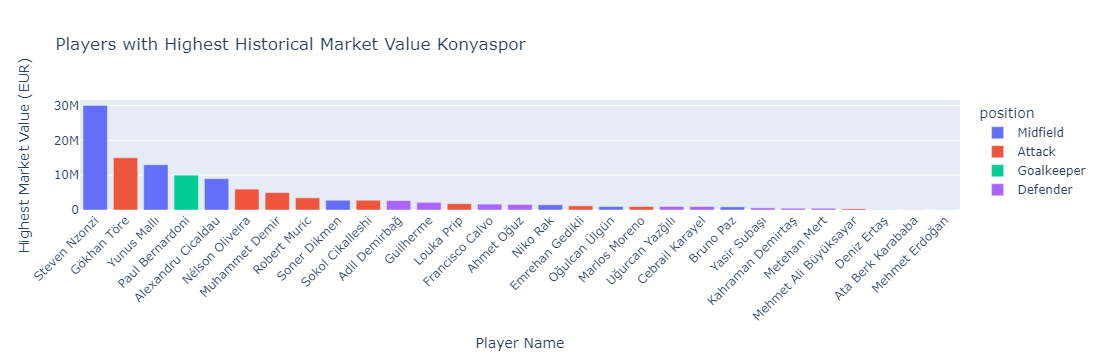

In [27]:
top_usedto_players_konyaspor = konyaspor.nlargest(30, 'highest_market_value_in_eur')

fig = px.bar(top_usedto_players_konyaspor, x='name', y='highest_market_value_in_eur',
             title='Players with Highest Historical Market Value Konyaspor',
             labels={'name': 'Player Name', 'highest_market_value_in_eur': 'Highest Market Value (EUR)'},
             color='position',
             hover_data={'highest_market_value_in_eur': ':,.2f', 'country_of_citizenship': True, 'date_of_birth': True})

fig.update_layout(xaxis_title='Player Name', yaxis_title='Highest Market Value (EUR)')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)

fig.show()

Age Distribution - Konyaspor

C:\Users\Ali Riza Ercan\AppData\Local\Temp\ipykernel_20064\2512651503.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



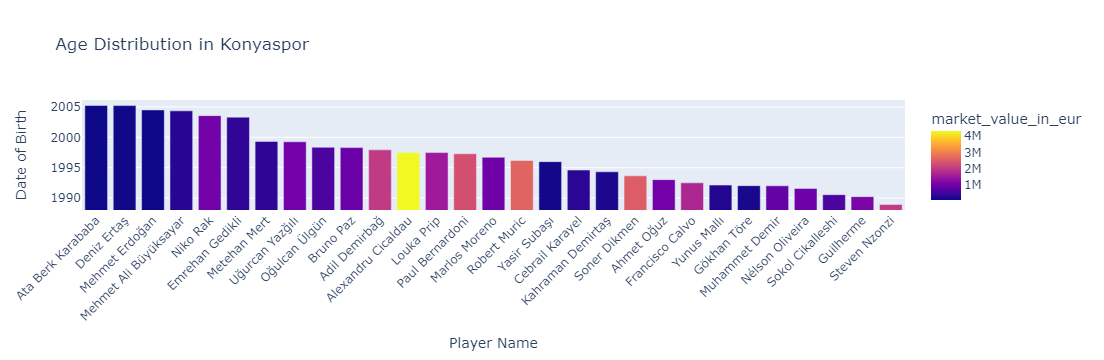

In [28]:
konyaspor['date_of_birth'] = pd.to_datetime(konyaspor['date_of_birth'])

age_distribution_konyaspor = konyaspor.nlargest(30, 'date_of_birth')

fig = px.bar(age_distribution_konyaspor, x='name', y='date_of_birth',
             title='Age Distribution in Konyaspor',
             labels={'name': 'Player Name', 'date_of_birth': 'Date of Birth'},
             color='market_value_in_eur',
             hover_data={'market_value_in_eur': ':,.2f', 'country_of_citizenship': True, 'date_of_birth': True})
           

fig.update_layout(xaxis_title='Player Name', yaxis_title='Date of Birth')
fig.update_xaxes(categoryorder='total descending', tickangle=-45)

fig.show()

In [29]:
konyaspor[["first_name", "last_name", "position", "foot"]].sort_values(by="position")

,first_name,last_name,position,foot
9926,Robert,Muric,Attack,left
9980,Muhammet,Demir,Attack,right
9984,Sokol,Cikalleshi,Attack,right
13957,Louka,Prip,Attack,left
14018,Marlos,Moreno,Attack,right
19932,Ata Berk,Karababa,Attack,left
19947,Gökhan,Töre,Attack,left
29646,Nélson,Oliveira,Attack,right
30278,Emrehan,Gedikli,Attack,right
26025,Mehmet Ali,Büyüksayar,Attack,right


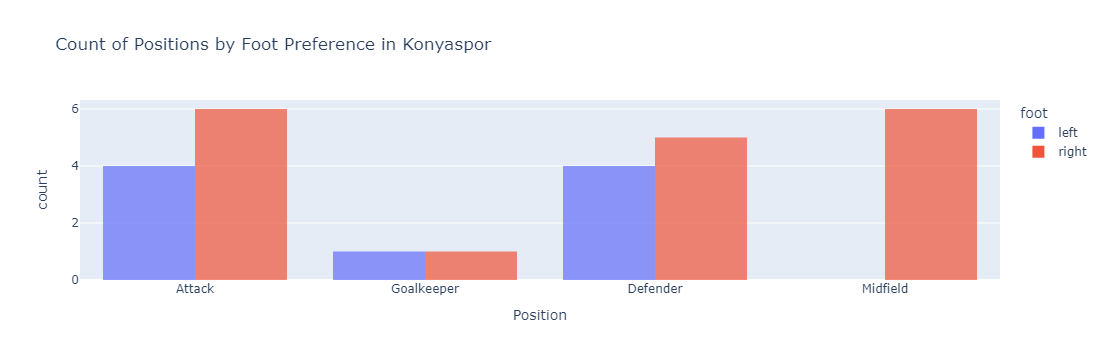

In [30]:
fig = px.histogram(konyaspor, x='position', color='foot', barmode='group',
                   title='Count of Positions by Foot Preference in Konyaspor',
                   labels={'position': 'Position'}, opacity=0.7)
fig.show()

Height Distribution - Konyaspor

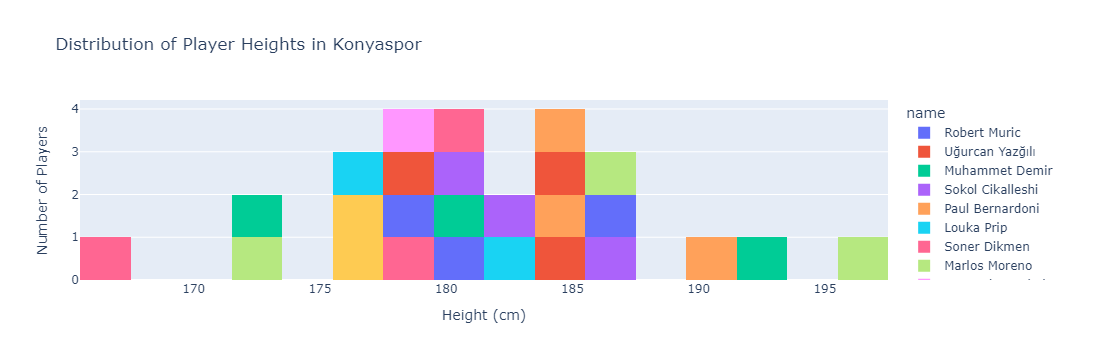

In [31]:
fig = px.histogram(konyaspor, x='height_in_cm', nbins=20,
                   title='Distribution of Player Heights in Konyaspor',
                   labels={'height_in_cm': 'Height (cm)', 'count': 'Number of Players'}, color="name")

fig.update_layout(xaxis_title='Height (cm)', yaxis_title='Number of Players')

fig.show()